In [8]:
import tensorflow as tf
from tensorflow import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
X=pickle.load(open("X.pickle", "rb"))
y=pickle.load(open("y.pickle", "rb"))

In [10]:
num_features = 32
num_labels = 2
batch_size = 128
epochs = 13
width, height = 50, 50

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(num_features*2*2, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1),))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(num_features*2*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2*2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(keras.optimizers.Adam(),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )
model.summary()
history=model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[reduce_lr]
          )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0

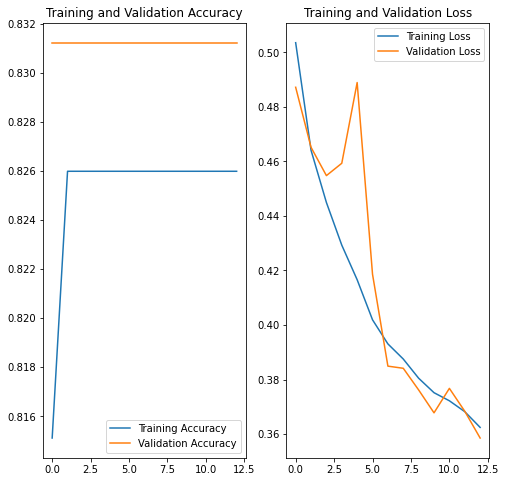

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [94]:
F=pickle.load(open("Faces_1S_1.pickle", "rb"))
ynew = model.predict(F)
for i in range(len(F)):
    print("F=%s, Predicted=%s" % (F[i], ynew[i]))
    break

F=[[[0.53333333]
  [0.6       ]
  [0.6       ]
  ...
  [0.17647059]
  [0.58823529]
  [0.60392157]]

 [[0.6       ]
  [0.6745098 ]
  [0.6745098 ]
  ...
  [0.01568627]
  [0.65098039]
  [0.67843137]]

 [[0.6       ]
  [0.67058824]
  [0.67843137]
  ...
  [0.05490196]
  [0.64313725]
  [0.67843137]]

 ...

 [[0.58039216]
  [0.64705882]
  [0.64705882]
  ...
  [0.61176471]
  [0.58431373]
  [0.57254902]]

 [[0.58039216]
  [0.65098039]
  [0.65098039]
  ...
  [0.64313725]
  [0.63529412]
  [0.64313725]]

 [[0.58431373]
  [0.65098039]
  [0.64705882]
  ...
  [0.65098039]
  [0.64705882]
  [0.64705882]]], Predicted=[0.84796727]


In [95]:
import os
face_l_1S_1=F[np.argmin(ynew)]
face_e_1S_1=F[np.argmax(ynew)]
path='StressDataset'
cv2.imwrite(os.path.join(path ,'face_l_1S_1.jpg'), 255*face_l_1S_1)
cv2.imwrite(os.path.join(path,'face_e_1S_1.jpg'), 255*face_e_1S_1)

True